In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# import warnings 
# #We do not want to see warnings
# warnings.filterwarnings("ignore") 

df = pd.read_csv("uber.csv")
df.head()
print(df.info())
print("-----------------------")
#count of missing values
print(df.isnull().sum())
df = df.dropna()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB
None
-----------------------
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [20]:
# Calculate distance using simple Euclidean formula
df["distance"] = (
    ((df['dropoff_latitude'] - df['pickup_latitude'])**2 +
     (df['dropoff_longitude'] - df['pickup_longitude'])**2) * 0.5
)

# Filter for reasonable fare, passenger count, and distance
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 100)]
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] <= 6)]
df = df[df['distance'] < 5]

In [21]:
# Extract time features
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek


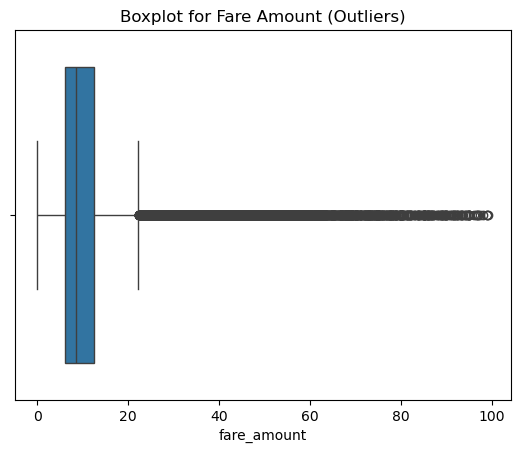

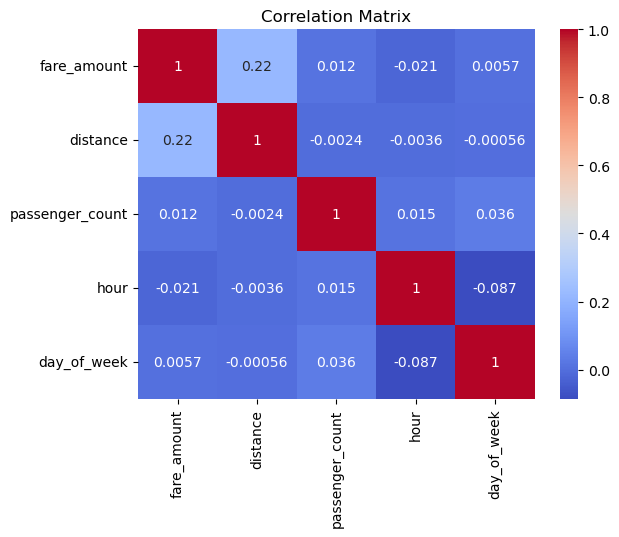

In [22]:

# Boxplot for fare amount
sns.boxplot(x=df['fare_amount'])
plt.title("Boxplot for Fare Amount (Outliers)")
plt.show()

# Correlation heatmap
corr = df[['fare_amount', 'distance', 'passenger_count', 'hour', 'day_of_week']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [23]:
# Feature and target selection
X = df[['distance', 'passenger_count', 'hour', 'day_of_week']]
y = df['fare_amount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [24]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation function
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Results:")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.4f}\n")


In [25]:
evaluate(y_test, y_pred_lr, "Linear Regression")
evaluate(y_test, y_pred_rf, "Random Forest Regression")

Linear Regression Results:
  R² Score: 0.0663
  RMSE: 9.0284

Random Forest Regression Results:
  R² Score: 0.7545
  RMSE: 4.6290



{'whiskers': [<matplotlib.lines.Line2D at 0x21f24569310>,
 'caps': [<matplotlib.lines.Line2D at 0x21f24569590>,
 'boxes': [<matplotlib.lines.Line2D at 0x21f245691d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21f24569810>],
 'fliers': [<matplotlib.lines.Line2D at 0x21f35e85d10>],
 'means': []}

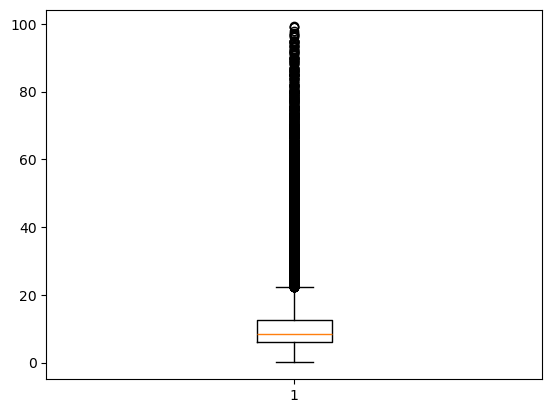

In [26]:
plt.boxplot(df['fare_amount'])